# Data Analysis on meteorogical data

## Importing libraries

In [70]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

## Setting display parameters

In [71]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] =14
matplotlib.rcParams['xtick.labelsize'] =12
matplotlib.rcParams['ytick.labelsize'] =12
matplotlib.rcParams['text.color']='k'

### Load the dataset

In [99]:
data = pd.read_csv('weatherHistory.csv')
data.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.


### Dimensions of data set

In [73]:
data.shape

(96453, 11)

### Data types of data frame and statistical details

In [74]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


### Handling null values

In [76]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [77]:
data.dropna(inplace=True)

### Columns present in dataset

In [78]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

### Heatmap for correlation of columns

<AxesSubplot:>

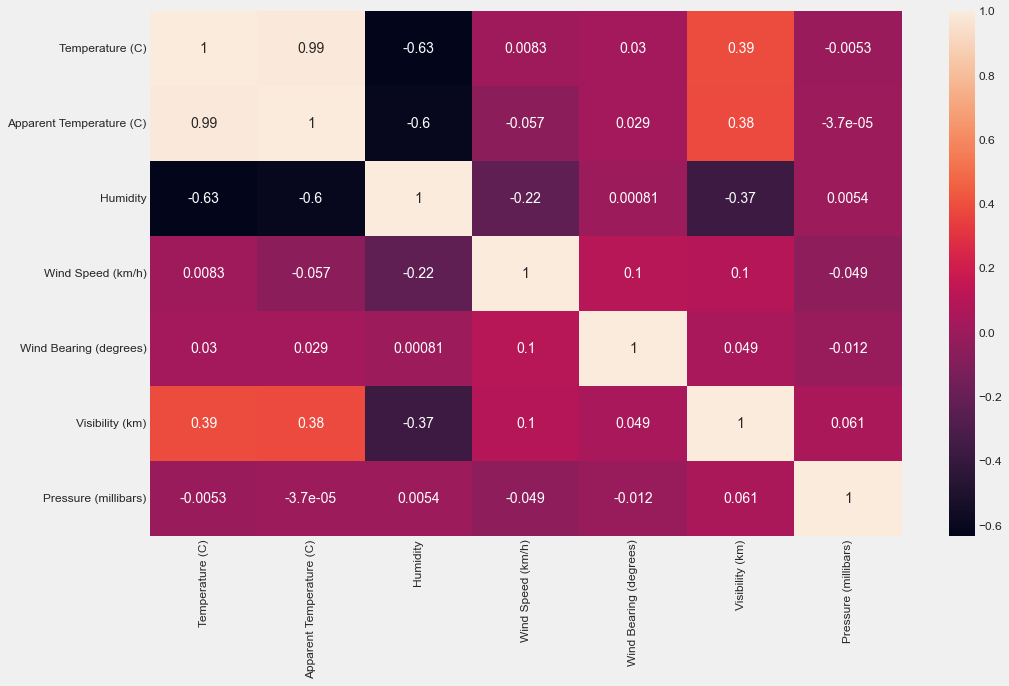

In [79]:
plt.figure(figsize=(15,9))
sns.heatmap(data=data.corr(),annot=True)

### Parsing date

In [80]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'],utc=True)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95936 non-null  datetime64[ns, UTC]
 1   Summary                   95936 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           95936 non-null  float64            
 4   Apparent Temperature (C)  95936 non-null  float64            
 5   Humidity                  95936 non-null  float64            
 6   Wind Speed (km/h)         95936 non-null  float64            
 7   Wind Bearing (degrees)    95936 non-null  int64              
 8   Visibility (km)           95936 non-null  float64            
 9   Pressure (millibars)      95936 non-null  float64            
 10  Daily Summary             95936 non-null  object             
dtypes: datetime64[n

### Unique records

In [82]:
data.nunique()

Formatted Date              95912
Summary                        27
Precip Type                     2
Temperature (C)              7573
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Pressure (millibars)         4971
Daily Summary                 214
dtype: int64

### Setting index

In [83]:
data=data.reset_index()

In [84]:
data = data.set_index('Formatted Date')
data

,index,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


### Resampling only for temperature and humidity

In [85]:
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = data[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


### Exploratory Data Analysis

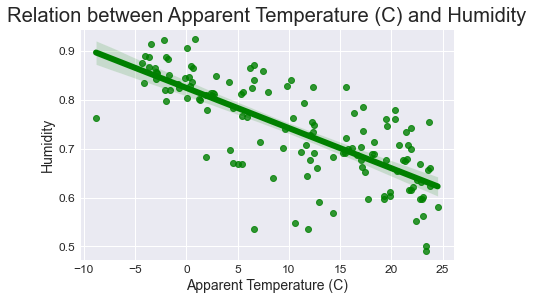

In [86]:
sns.set_style("darkgrid")
sns.regplot(data=df_monthly_mean,x='Apparent Temperature (C)',y='Humidity',color='g')
plt.title("Relation between Apparent Temperature (C) and Humidity")
plt.show()

Text(0.5, 1.0, 'Variation of Apparent Temperature and Humidity with time')

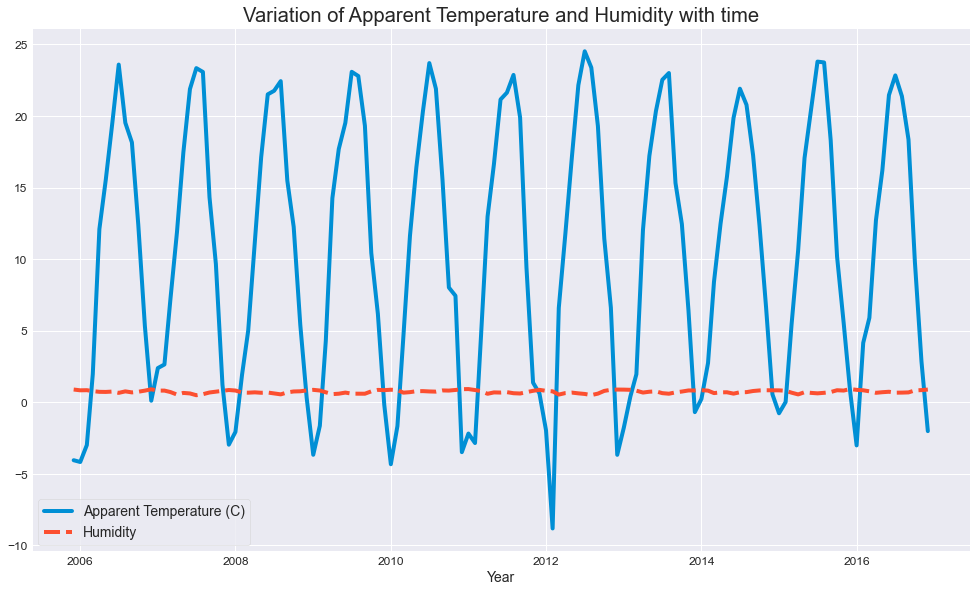

In [87]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df_monthly_mean)
plt.xlabel('Year')
plt.title("Variation of Apparent Temperature and Humidity with time")

### Correlation of apparent temperature and humidity

<AxesSubplot:title={'center':'Correlation between Apparent temperature & Humidity'}>

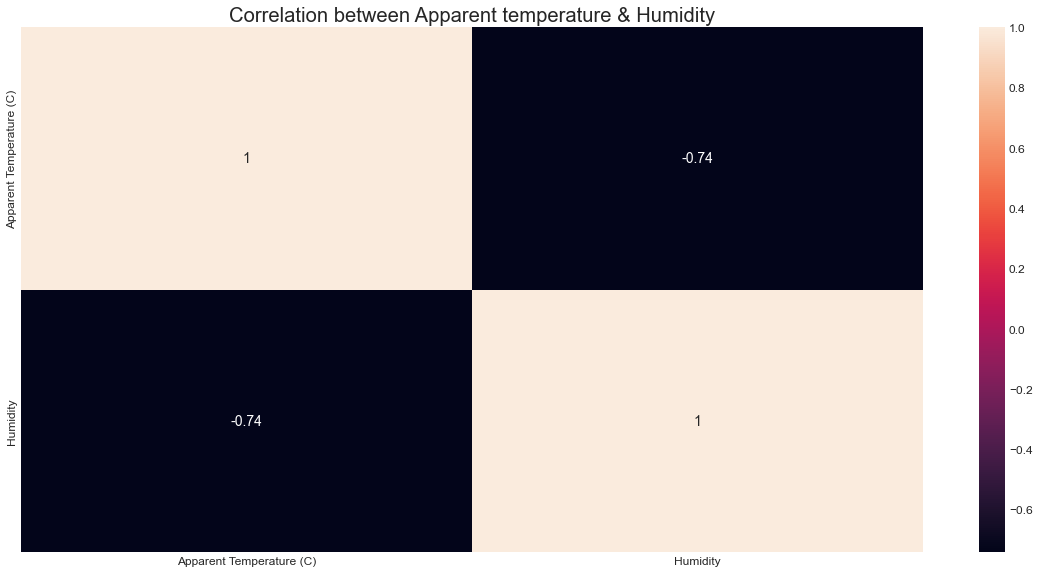

In [88]:
sns.set_style('darkgrid')
plt.figure(figsize = (18,9))
plt.title("Correlation between Apparent temperature & Humidity")
sns.heatmap(data=df_monthly_mean.corr(),annot=True)

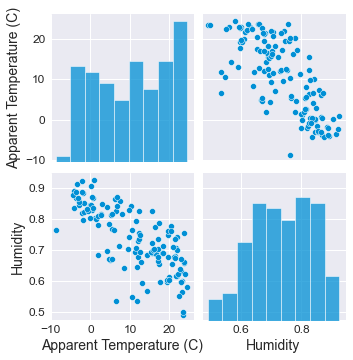

In [89]:
sns.pairplot(df_monthly_mean,kind='scatter')
plt.show()

### 2D Scatter plot with color coding for each summary type

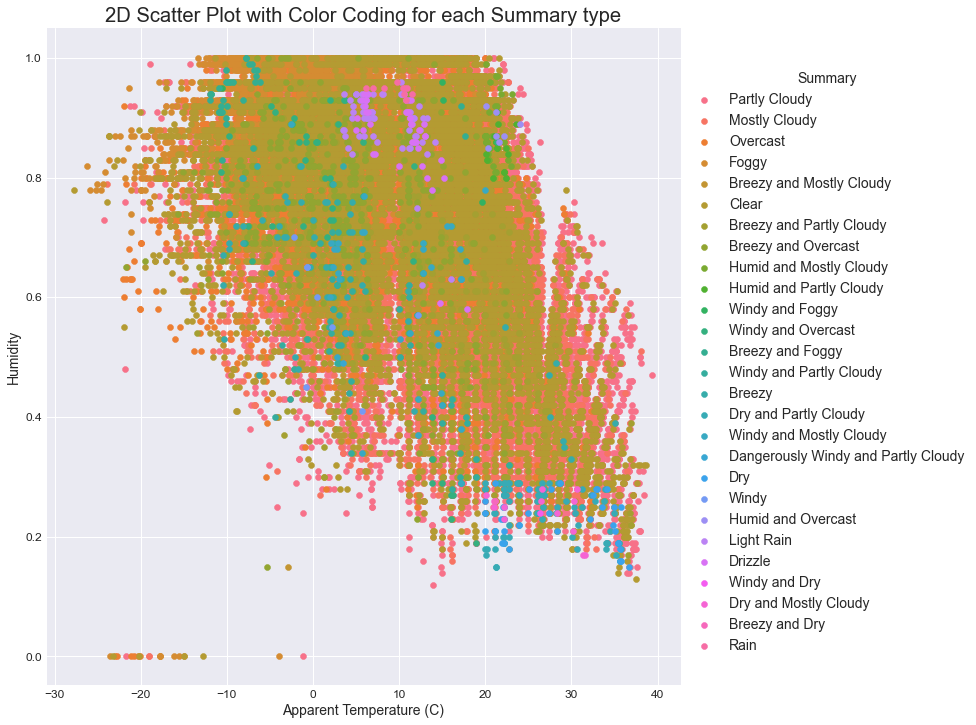

In [90]:
sns.set_style('darkgrid')
sns.FacetGrid(data,hue="Summary",height=10).map(plt.scatter,'Apparent Temperature (C)','Humidity').add_legend()
plt.title("2D Scatter Plot with Color Coding for each Summary type")
plt.show()

### Univariate analysis

In [91]:
data.head()

,index,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


Text(0.5, 1.0, 'Analysis of Weather Conditions with Apparent Temperature')

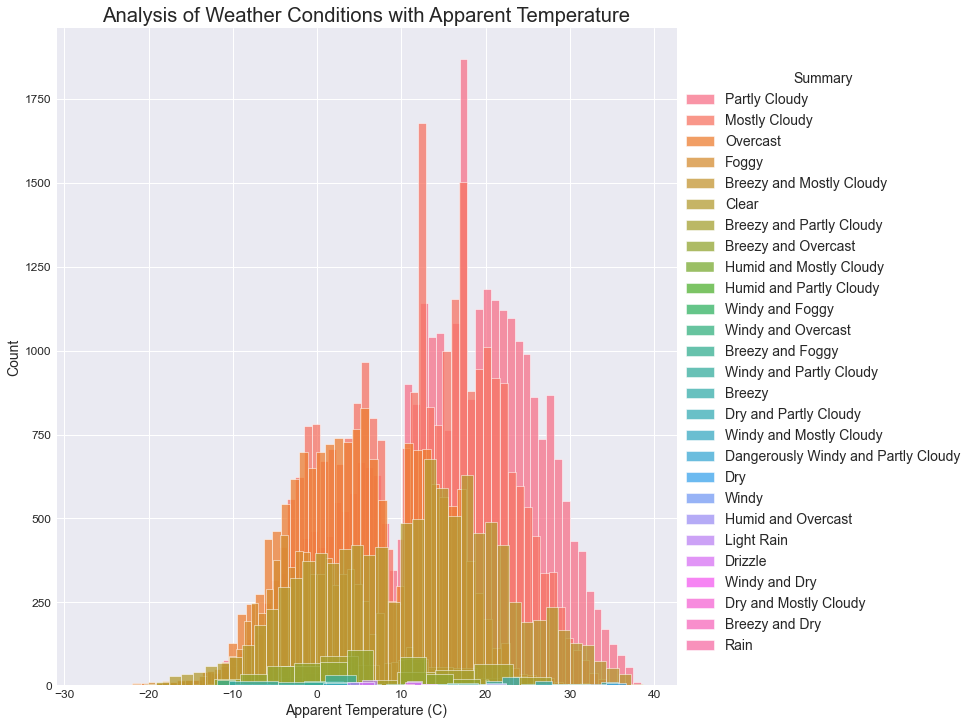

In [92]:
# For Apparent Temperature (C)
sns.set_style("darkgrid")
data = data.reset_index()
sns.FacetGrid(data, hue="Summary", height=10).map(sns.histplot, "Apparent Temperature (C)").add_legend()
plt.title("Analysis of Weather Conditions with Apparent Temperature")

Text(0.5, 1.0, 'Analysis of Weather Conditions with Humidity')

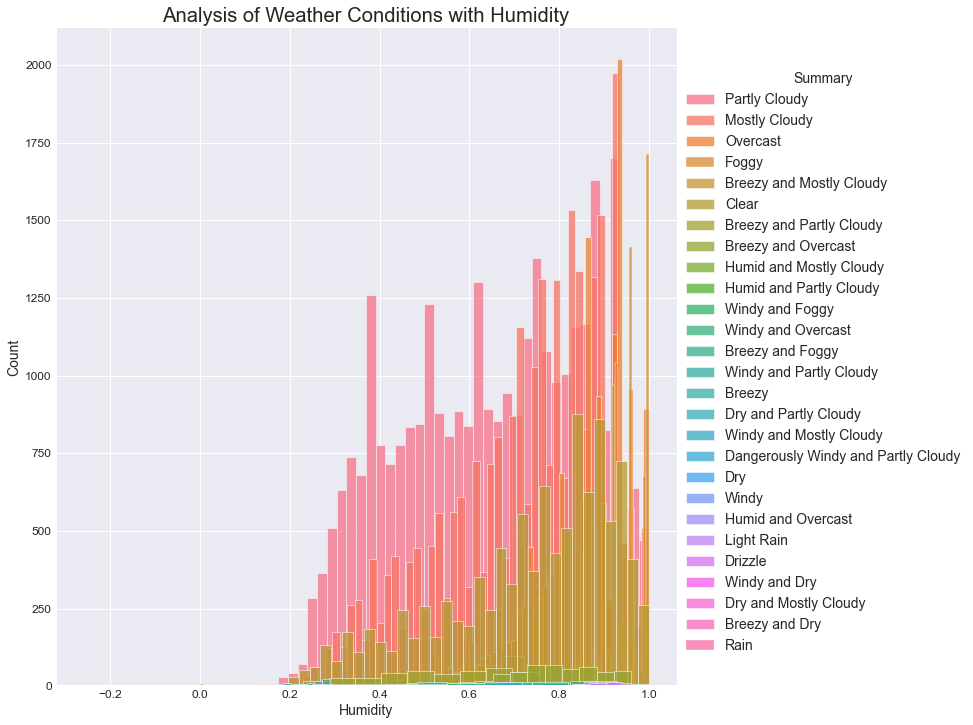

In [93]:
# For HUmidity
sns.set_style("darkgrid")
data = data.reset_index()
sns.FacetGrid(data, hue="Summary", height=10).map(sns.histplot, "Humidity").add_legend()
plt.title("Analysis of Weather Conditions with Humidity")

### Functions for plotting humidity and temperature for all months

In [94]:
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.show()

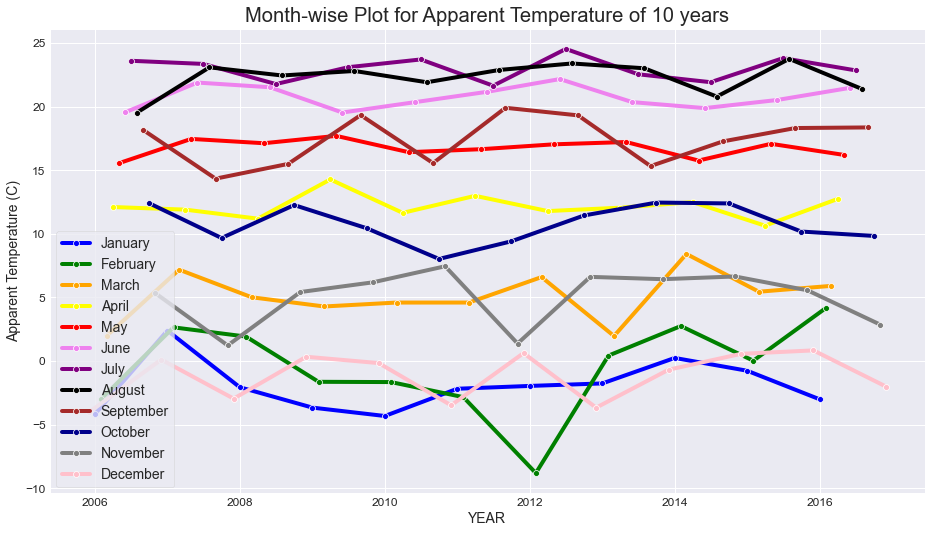

In [95]:
# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, TEMP_DATA)

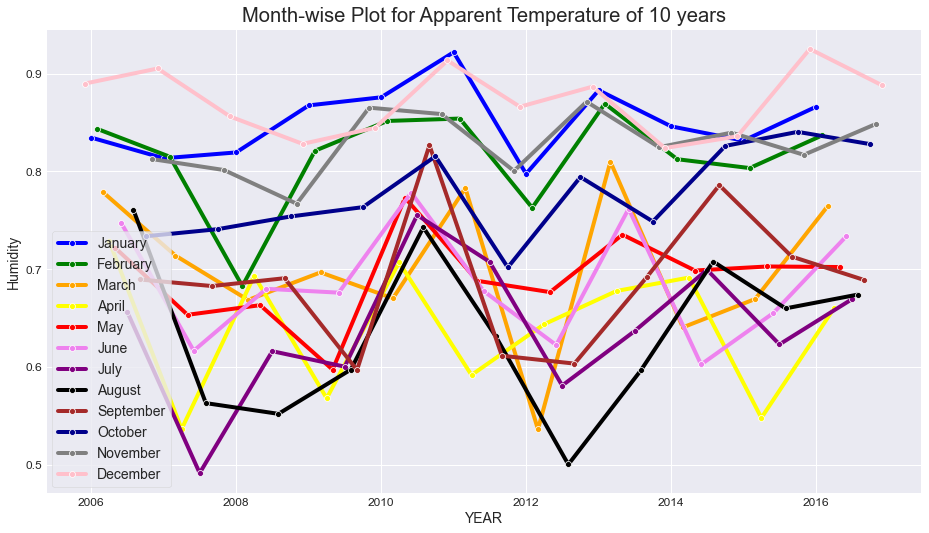

In [96]:
# Month-wise Plot for Humidity of 10 years 
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, HUM_DATA)

In [97]:
def sns_month_plot(month):
    plt.figure(figsize=(15,9))
    label = label_color(month)[0]
    plt.title('Apparent temperature vs humidity for {}'.format(label))
    plt.xlabel('YEAR')
    data = df_monthly_mean[df_monthly_mean.index.month== month]
    sns.lineplot(data=data,marker = 'o')
    plt.show()
    print('-'*80)

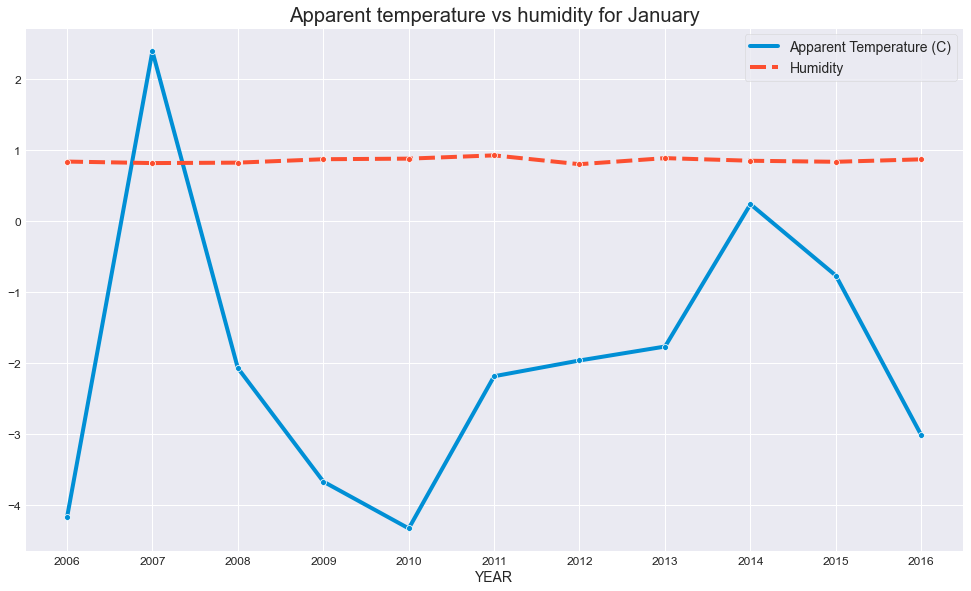

--------------------------------------------------------------------------------


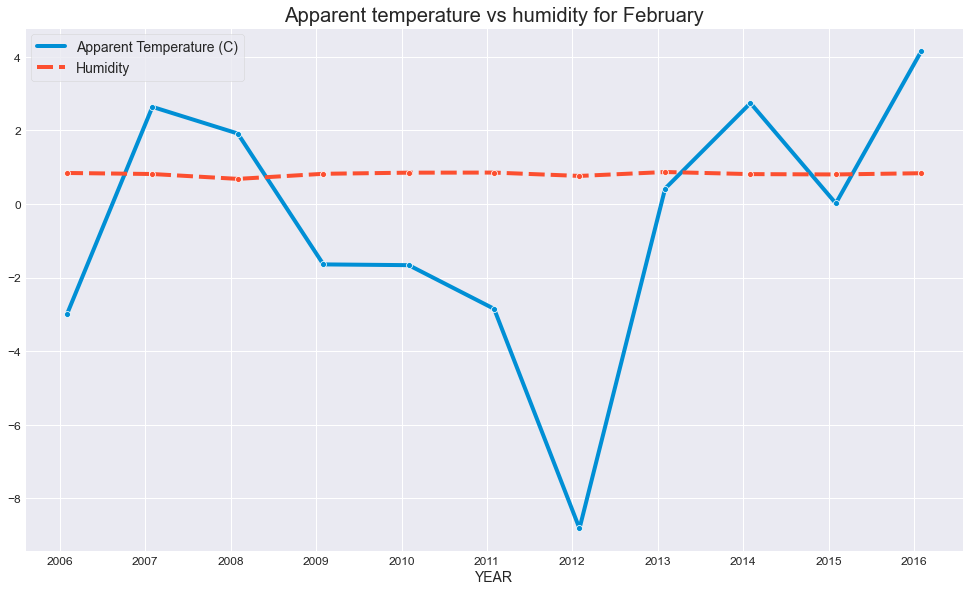

--------------------------------------------------------------------------------


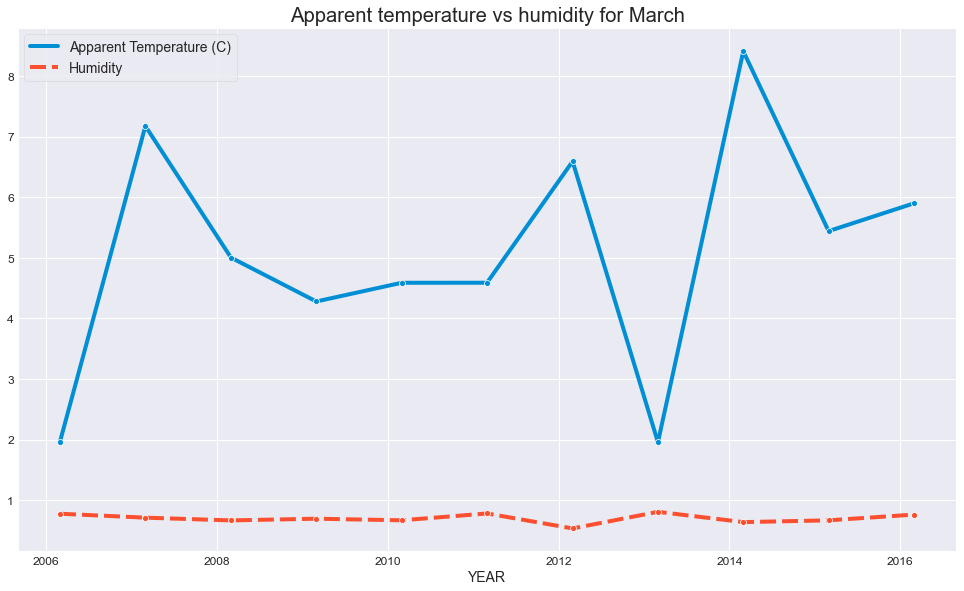

--------------------------------------------------------------------------------


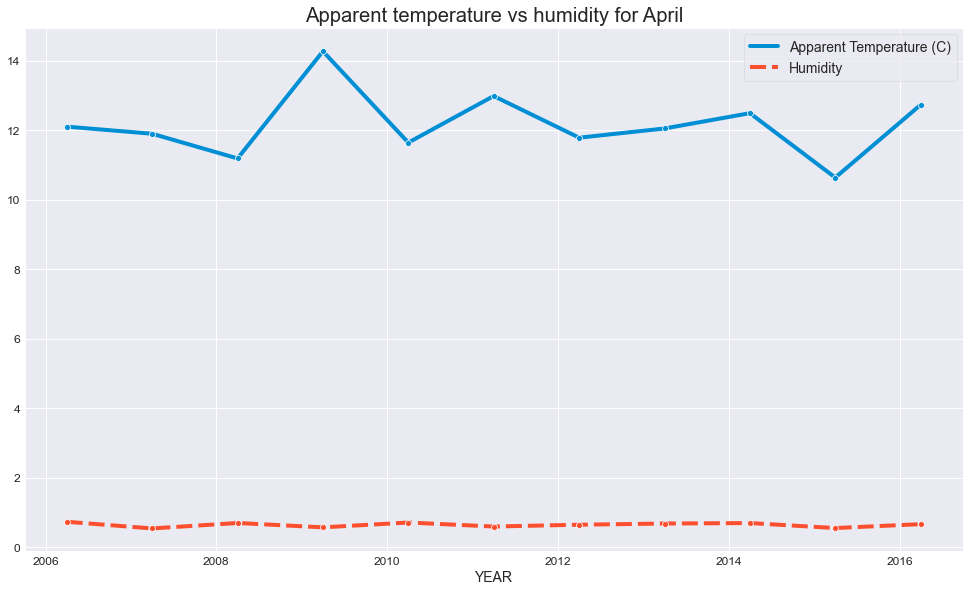

--------------------------------------------------------------------------------


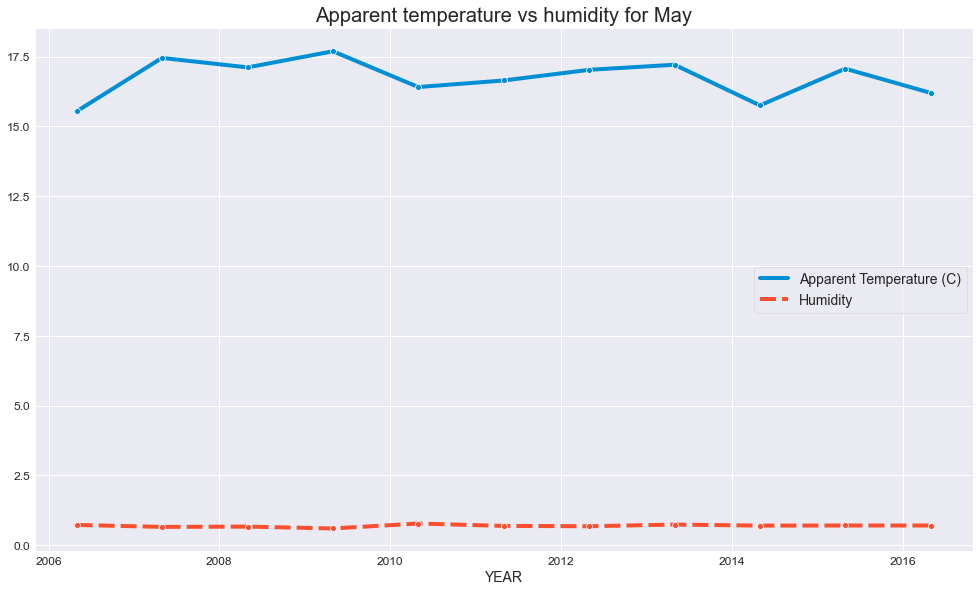

--------------------------------------------------------------------------------


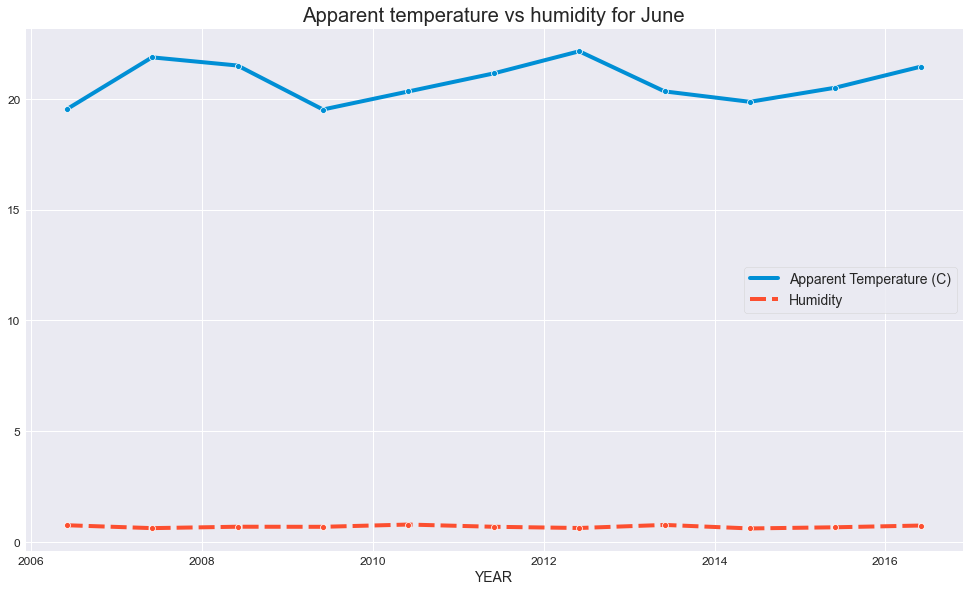

--------------------------------------------------------------------------------


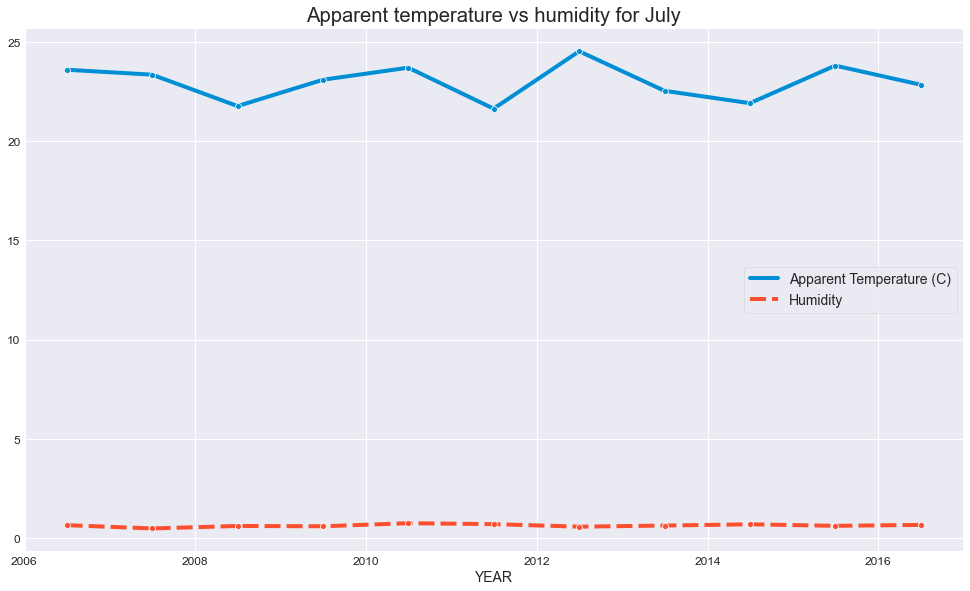

--------------------------------------------------------------------------------


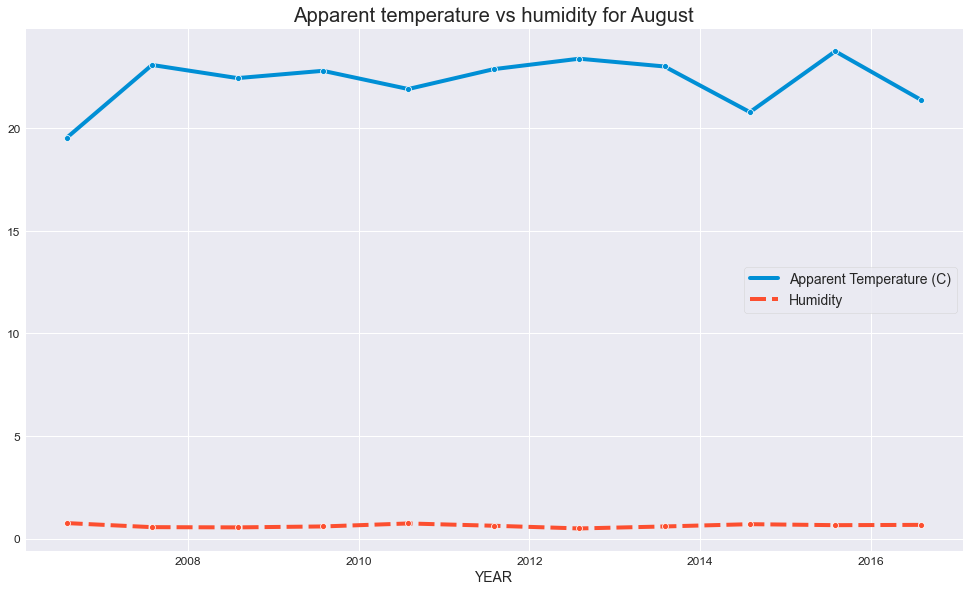

--------------------------------------------------------------------------------


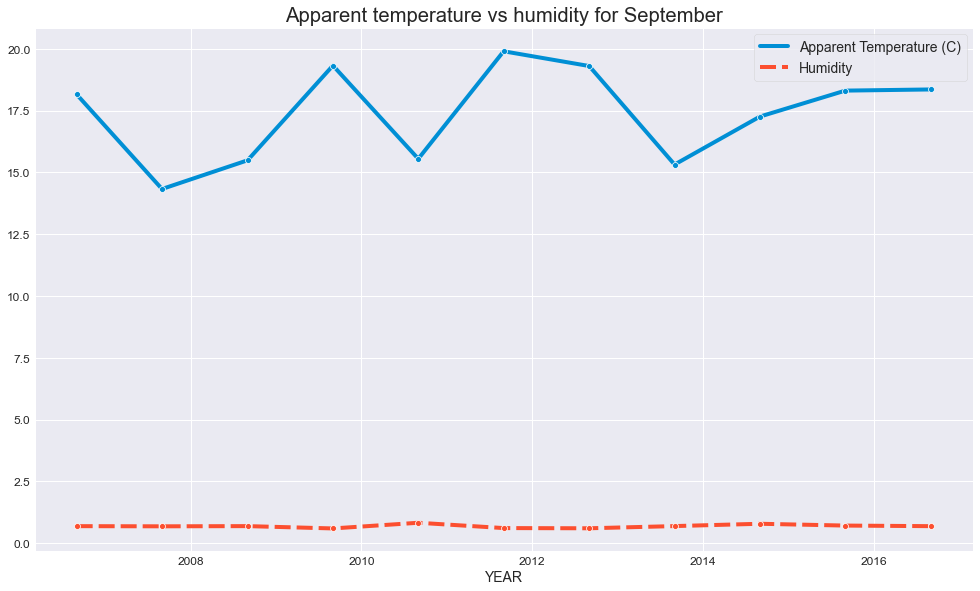

--------------------------------------------------------------------------------


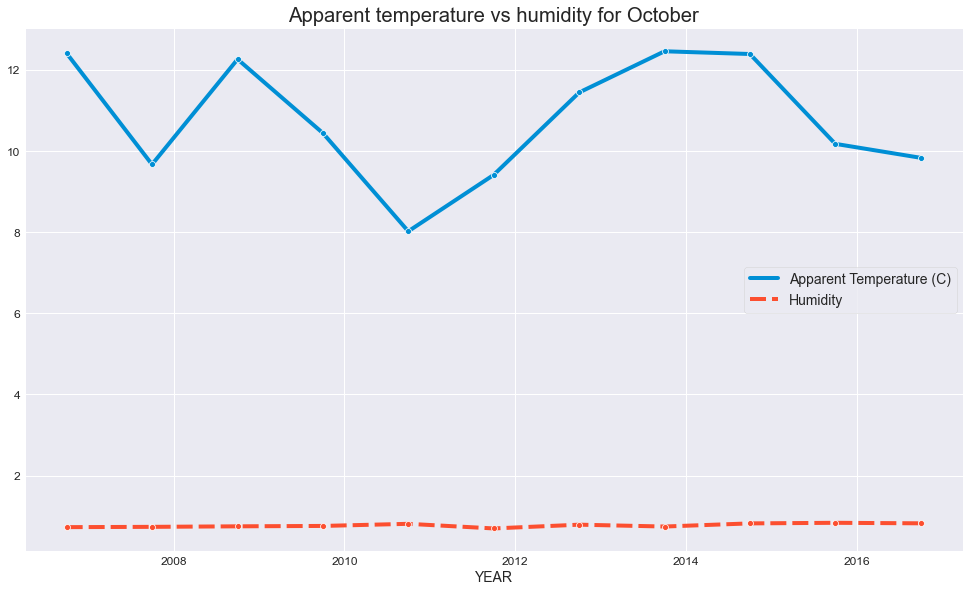

--------------------------------------------------------------------------------


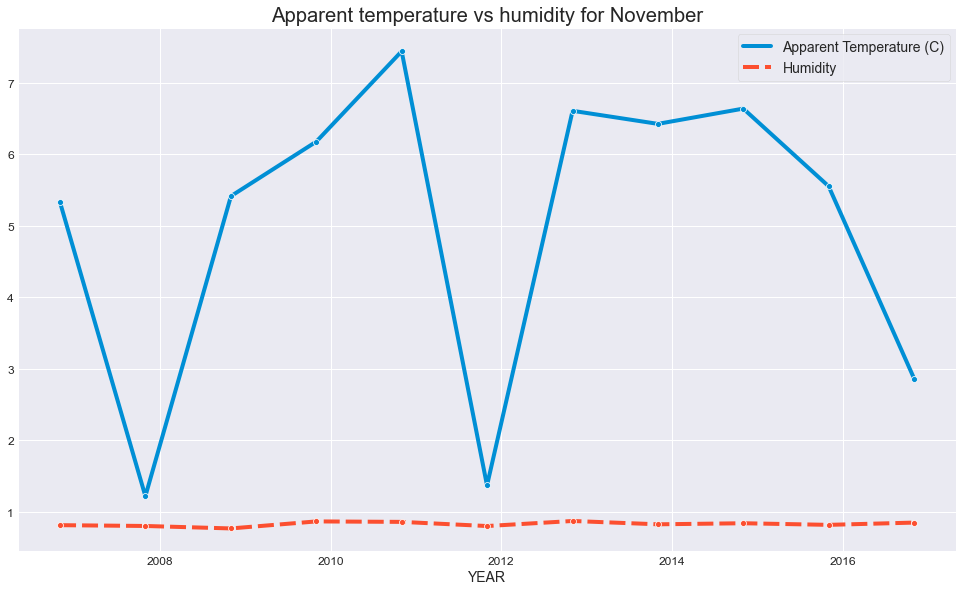

--------------------------------------------------------------------------------


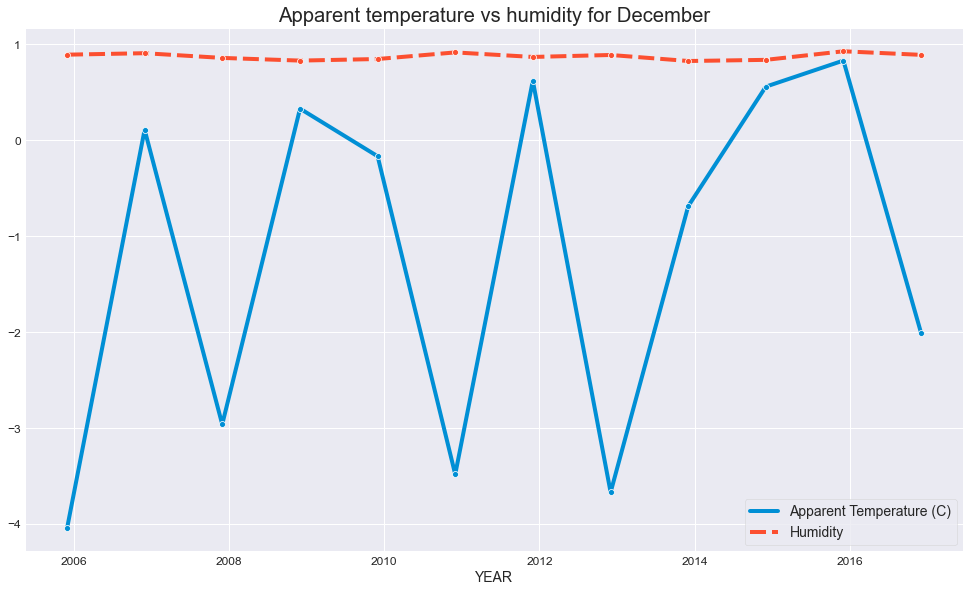

--------------------------------------------------------------------------------


In [98]:
for month in range(1,13):
    sns_month_plot(month)

## Conclusion:

There are many ups and downs in the temperature and average humidity has remainded constant throughout 2006 - 2016 . Therefore it can be seen that global warming has caused an effect on temperature changes in these years.

In [105]:
a = np.array([[1.3,2.4],[1.2,2.4]])
a.dtype
a.size

4

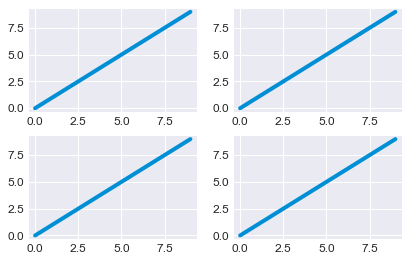

In [106]:
x = y = range(10)
fig,ax = plt.subplots(nrows=2 , ncols =2)
for row in ax:
    for col in row:
        col.plot(x,y)
plt.show()

In [107]:
a = np.random.random(12)
A =a.reshape(3,4)


In [108]:
m = np.arange(6).reshape(3,1,2)
n = np.arange(6).reshape(3,2,1)
m+n

array([[[ 0,  1],
        [ 1,  2]],

       [[ 4,  5],
        [ 5,  6]],

       [[ 8,  9],
        [ 9, 10]]])

In [109]:
print(np.arange(0,12,3))

[0 3 6 9]


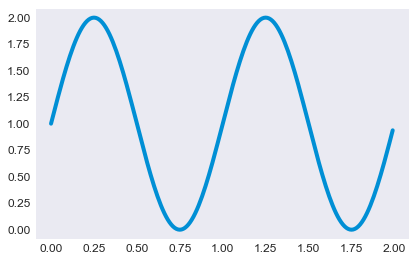

In [110]:
t = np.arange(0.0,2.0,0.01)
s = 1 + np.sin(2*np.pi*t)
fig ,ax = plt.subplots()
ax.plot(t,s)
ax.grid()
plt.show()

In [111]:
f = np.array([[1,2,3],[4,5,6]],dtype = complex)
print(f)

[[1.+0.j 2.+0.j 3.+0.j]
 [4.+0.j 5.+0.j 6.+0.j]]


In [114]:
b = np.array([[1.3,2.4],[0.3,4.1]])
print(b.dtype)
print(b.size)

float64
4
